In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

In [2]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [4]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [10]:
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
print(train_size)
batch_size = 100
learning_rate = 0.1

60000


In [11]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [16]:
iter_per_epoch = max(train_size / batch_size,1)
iter_per_epoch

600.0

In [17]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7829666666666667, 0.7893
train acc, test acc | 0.8769166666666667, 0.8819
train acc, test acc | 0.8982666666666667, 0.9023
train acc, test acc | 0.9080333333333334, 0.9133
train acc, test acc | 0.9147333333333333, 0.918
train acc, test acc | 0.9195833333333333, 0.9213
train acc, test acc | 0.9236166666666666, 0.9266
train acc, test acc | 0.9272333333333334, 0.9287
train acc, test acc | 0.9312666666666667, 0.9342
train acc, test acc | 0.9334, 0.9343
train acc, test acc | 0.9359666666666666, 0.9369
train acc, test acc | 0.9391166666666667, 0.9394
train acc, test acc | 0.9408, 0.9421
train acc, test acc | 0.9424333333333333, 0.9419
train acc, test acc | 0.94445, 0.9438
train acc, test acc | 0.9455666666666667, 0.9443


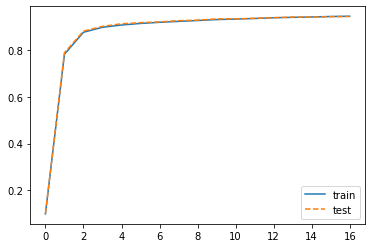

In [22]:
plt.plot(range(len(train_acc_list)),train_acc_list,label='train')
plt.plot(range(len(test_acc_list)),test_acc_list,linestyle = "--",label='test')
plt.legend()